# Fashion MNIST

## Introducción al problema

Fashion MNIST (F-MNIST) es un Data Set de imagenes de articulos de la empresa Zalando. El cual consiste de un set de entrenamiento de 60,000 ejemplos y 10,000 prueba, en los cuales, cada ejemplo consta de una imagen en escala de grises de 28x28 pixeles asociada con una etiqueta de 10 diferentes categorías. 

Su vinculo o relación con el problema MNIST consta del formato del Data Set, el cual comparte el tamaño de las imagenes y volumen del Data Set. Ambos problemas funcionan como benchmarks o metricas de rendimiento para algoritmos de Machine Learning (ML).

Por lo tanto, se busca entrenar diferentes algoritmos de ML con el Data Set de F-MNIST y comparar su rendimiento.


## Librerias

Para llevar a cabo el desarrollo e implementación de los algoritmos de ML se utilizan las siguientes librerias:

- Numpy: Para operaciones vectoriales y matriciales elementales y compatibilidad entre objetos de diferentes librerias
- Matplotlib: Para graficar los resultados en figuras
- Scikit-learn: Para el entrenamiento, ajuste, evaluación y obtención de metricas de rendimiento de algoritmos ML así como la separación del Data Set en Entrenamiento y Prueba.
- TensorFlow: Para el entrenamiento y ajuste de algoritmos CNN (Deep Learning).

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve
import warnings
from sklearn.exceptions import ConvergenceWarning

## Data Set y Pre-procesamiento

Se carga el Data Set y se realiza un tratamiento de normalización, separación en conjunto de entrenamiento, prueba y validación, y se visualizan algunos de los elementos del Data Set.

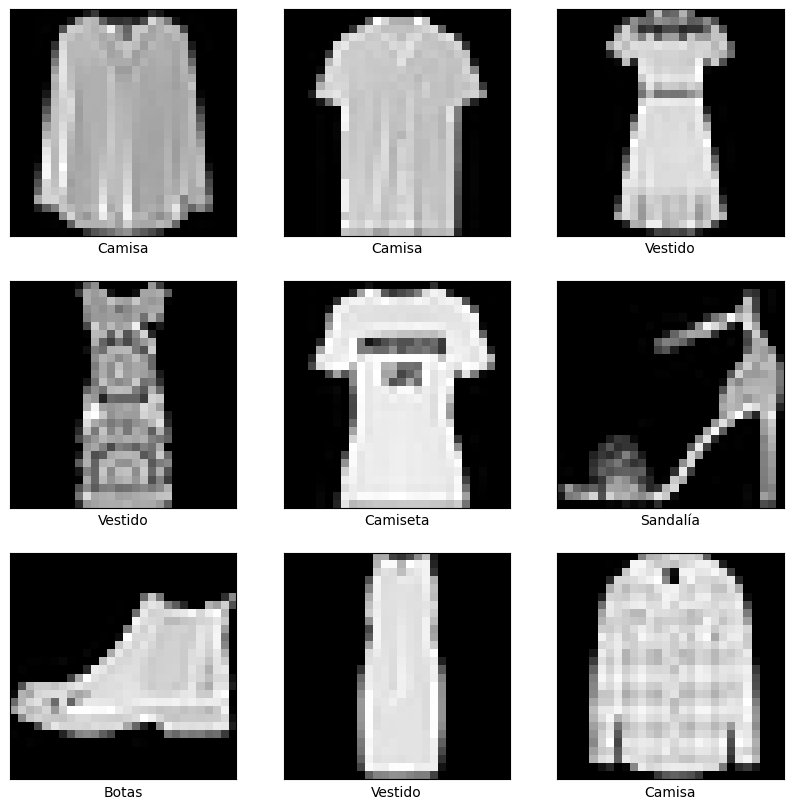

In [3]:
# ---- 1. Cargar dataset ----
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# ---- 2. Normalizar datos (0–255 -> 0–1) ----
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# ---- 3. Separar entrenamiento / validación ----
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# ---- 4. Expandir dimensión para añadir canal ----
X_train_cnn = X_train[..., tf.newaxis]
X_val_cnn = X_val[..., tf.newaxis]
X_test_cnn = X_test[..., tf.newaxis]

# ---- 5. Etiquetas de Fashion MNIST ----
class_names = [
    "Camiseta", "Pantalon", "Suéter", "Vestido", "Abrigo",
    "Sandalía", "Camisa", "Zapatillas", "Bolso", "Botas"
]

# ---- 6. Mostrar Prendas ----
plt.figure(figsize=(10,10))
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

# ---- 7. Aplanar imagenes ----
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)
X_val = X_val.reshape(len(X_val),-1)

## Regresión Logística

La regresión logística tambien es un algoritmo de Machine Learning cuya versión más elemental solo es capaz de realizar problemas de clasificación binarios; sin embargo, la generalización de la regresión logística permite resolver problemas de clasificación multinomial. Al igual que en los modelos previos, las entradas se combinan linealmente con los pesos y el sesgo de la forma:

$$
z = x_{i} \cdot w_{i} + b
$$

La particularidad de la regresión logistica es que el resultado se pasa a la función sigmoide

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

La cual transforma al valor en un valor en el rango de [0,1] que se interpreta como probabilidad. Finalmente el dato se clasifica en base a un umbral $\theta$. Representado matematicamente como:

$$
\hat{y} = 
\begin{cases}
1 & \text{si } \sigma(z) \geq \theta \\
0 & \text{si } \sigma(z) < \theta
\end{cases}
$$

/Users/josealmendarez/Desktop/Project-No.-1-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


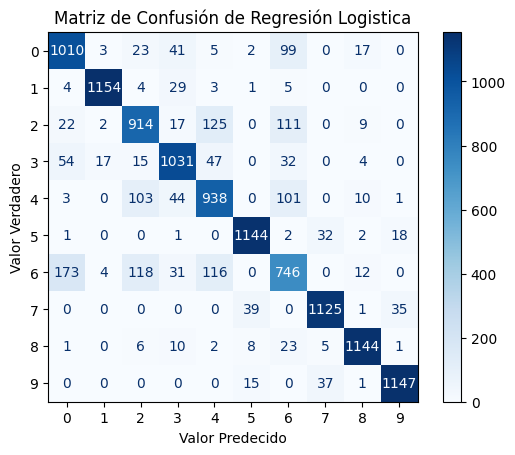

              precision    recall  f1-score   support

    Camiseta       0.80      0.84      0.82      1200
    Pantalon       0.98      0.96      0.97      1200
      Suéter       0.77      0.76      0.77      1200
     Vestido       0.86      0.86      0.86      1200
      Abrigo       0.76      0.78      0.77      1200
    Sandalía       0.95      0.95      0.95      1200
      Camisa       0.67      0.62      0.64      1200
  Zapatillas       0.94      0.94      0.94      1200
       Bolso       0.95      0.95      0.95      1200
       Botas       0.95      0.96      0.96      1200

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



In [4]:
# ---- 1. Entrenamiento y Evaluación de Regresión Logística ----
log_reg = LogisticRegression(
    solver = 'saga', n_jobs=1)
log_reg.fit(X_train, y_train)

y_pred_log_reg =  log_reg.predict(X_val)

# ---- 2. Display de Matriz de confusión ----
cm_log_reg = confusion_matrix(y_val, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp.plot(cmap = 'Blues', values_format='d')
plt.title('Matriz de Confusión de Regresión Logistica')
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Verdadero')
plt.show()

# ---- 3. Reporte de Clasificación ----
print(classification_report(y_val, y_pred_log_reg, target_names=class_names))

## Support Vector Machine

Supor Vector Machine es un algoritmo de Machine Learning clasificado como aprendizaje supervisado, que suele ser utilizado en problemas de clasificación y atipicamente en problemas de regresión. 

Este algoritmo busca encontrar una frontera de decisión conocida como hiperplano, el cual separe de la mejor manera posible a las diferentes clases de los datos. El hiperplano debe maximizar la distancia entre la frontera y los puntos más cercanos conocidos como vectores de soporte.

Matematicamente, un hiperplano se define como:

$$
w \cdot x + b = 0
$$

Los simbolos comparten la nomenclatura que el perceptron.

La clasificación se lleva a cabo mediante la función signo:

$$
\hat{y} = signo(w \cdot x + b)
$$

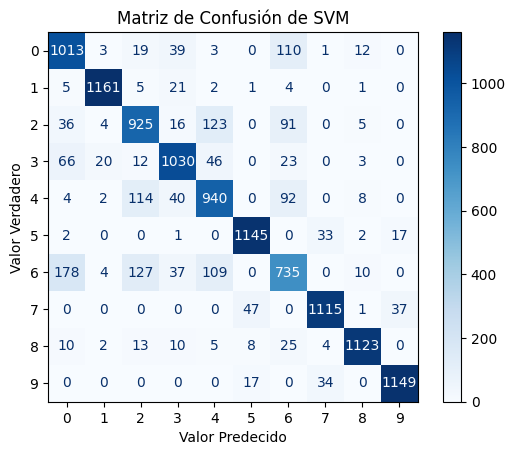

              precision    recall  f1-score   support

    Camiseta       0.77      0.84      0.81      1200
    Pantalon       0.97      0.97      0.97      1200
      Suéter       0.76      0.77      0.77      1200
     Vestido       0.86      0.86      0.86      1200
      Abrigo       0.77      0.78      0.77      1200
    Sandalía       0.94      0.95      0.95      1200
      Camisa       0.68      0.61      0.64      1200
  Zapatillas       0.94      0.93      0.93      1200
       Bolso       0.96      0.94      0.95      1200
       Botas       0.96      0.96      0.96      1200

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



In [5]:
# ---- 1. Entrenamiento de SVM
SVM = SVC(kernel = 'linear',random_state=42)
SVM.fit(X_train,y_train)
y_pred_svm = SVM.predict(X_val)

# ---- 2. Display de Matriz de confusión ----
cm_svm = confusion_matrix(y_val, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap = 'Blues', values_format='d')
plt.title('Matriz de Confusión de SVM')
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Verdadero')
plt.show()

# ---- 3. Reporte de Clasificación ----
print(classification_report(y_val, y_pred_svm, target_names=class_names))

## Random Forest

Random Forest es un algoritmo de Machine Learning de tipo ensamble, basado en la combinación de múltiples árboles de decisión. Su principio es que la agregación de varios modelos débiles (árboles individuales) da lugar a un modelo más robusto y generalizable.

Cada árbol se entrena con una muestra aleatoria de los datos (bootstrap) y, en cada división, solo se considera un subconjunto aleatorio de características. Esto introduce diversidad entre los árboles.

En la clasificación, cada árbol vota por una clase, y la predicción final se obtiene por mayoría de votos. En regresión, la salida es el promedio de las predicciones de los árboles.

Matemáticamente, para clasificación:

$$
\hat{y} = { h_{1}(x), h_{2}(x), \dots, h_{n}(x) }
$$

y para regresión:

$$
\hat{y} = \frac{1}{n} \sum_{i=1}^{n} h_{i}(x)
$$

donde $h_{i}$ representa el $i$-ésimo árbol.

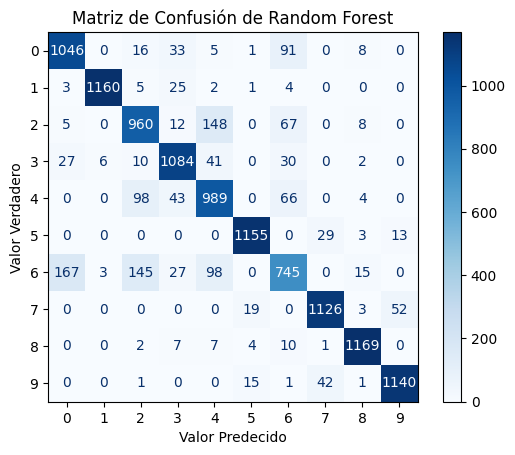

              precision    recall  f1-score   support

    Camiseta       0.84      0.87      0.85      1200
    Pantalon       0.99      0.97      0.98      1200
      Suéter       0.78      0.80      0.79      1200
     Vestido       0.88      0.90      0.89      1200
      Abrigo       0.77      0.82      0.79      1200
    Sandalía       0.97      0.96      0.96      1200
      Camisa       0.73      0.62      0.67      1200
  Zapatillas       0.94      0.94      0.94      1200
       Bolso       0.96      0.97      0.97      1200
       Botas       0.95      0.95      0.95      1200

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



In [6]:
# --- 1. Entrenamiento y Evaluación de Random Forest ----
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_val)

# --- 2. Display de Matriz de Confusión ----
cm_rf = confusion_matrix(y_val, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión de Random Forest')
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Verdadero')
plt.show()

# --- 3. Reporte de Clasificación ----
print(classification_report(y_val, y_pred_rf, target_names=class_names))

## Perceptron Multicapa

Un **MLP (Multi-Layer Perceptron)** es una red neuronal artificial de tipo *feedforward* utilizada en **clasificación y regresión**.  
Se organiza en **capas**:  

- **Capa de entrada**: recibe las características del dataset.  
- **Capas ocultas**: transforman la información con funciones de activación no lineales.  
- **Capa de salida**: entrega la predicción final.  

### Definición matemática

Cada **neurona** aplica una combinación lineal de sus entradas con **pesos** y un **sesgo**:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

Luego, pasa por una **función de activación** $ f(\cdot) $:

$$
a = f(z)
$$

Un MLP con \( L \) capas se define como:

$$
h^{(l)} = f\left( W^{(l)} h^{(l-1)} + b^{(l)} \right), \quad l = 1, 2, \dots, L
$$

donde:  
- $h^{(0)}$ son las entradas,  
- $W^{(l)}$ son los pesos de la capa \( l \),  
- $b^{(l)}$ son los sesgos,  
- $h^{(L)}$ es la salida final.


### Entrenamiento

- Se usa **backpropagation** para actualizar los parámetros $ W, b $.  
- El objetivo es minimizar una **función de pérdida** (ej. entropía cruzada o error cuadrático medio) mediante **optimizadores** como Adam o Gradiente Descendente.  



### Aplicaciones

- Reconocimiento de patrones.  
- Clasificación de imágenes o texto.  
- Predicción en regresión y series temporales simples.  

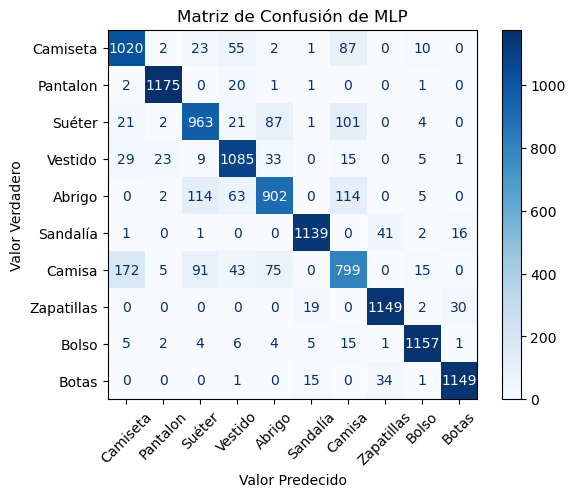

              precision    recall  f1-score   support

    Camiseta       0.82      0.85      0.83      1200
    Pantalon       0.97      0.98      0.97      1200
      Suéter       0.80      0.80      0.80      1200
     Vestido       0.84      0.90      0.87      1200
      Abrigo       0.82      0.75      0.78      1200
    Sandalía       0.96      0.95      0.96      1200
      Camisa       0.71      0.67      0.69      1200
  Zapatillas       0.94      0.96      0.95      1200
       Bolso       0.96      0.96      0.96      1200
       Botas       0.96      0.96      0.96      1200

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



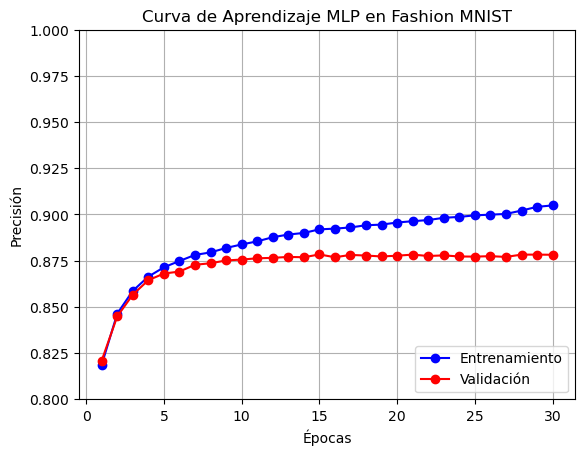

In [19]:
# ---- 1. Entrenamiento de MLP ----
mlp = MLPClassifier(hidden_layer_sizes=(32,16), 
                    max_iter=1,  # entrenar de 1 en 1
                    warm_start=True,
                    random_state=42)

epochs = 30
train_acc = []
val_acc = []

warnings.filterwarnings("ignore", category=ConvergenceWarning)
for epoch in range(epochs):
    mlp.fit(X_train, y_train)  # entrena una época
    # Accuracy en entrenamiento y validación
    train_acc.append(accuracy_score(y_train, mlp.predict(X_train)))
    val_acc.append(accuracy_score(y_val, mlp.predict(X_val)))
y_pred_mlp = mlp.predict(X_val)

# ---- 2. Display de Matriz de confusión ----
cm_mlp = confusion_matrix(y_val, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=class_names)
disp.plot(cmap = 'Blues', values_format='d', xticks_rotation=45)
plt.title('Matriz de Confusión de MLP')
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Verdadero')
plt.show()

# ---- 3. Reporte de Clasificación ----
print(classification_report(y_val, y_pred_mlp, target_names=class_names))

# ---- 4. Grafica de Curva de Aprendizaje ----
plt.plot(range(1, epochs+1), train_acc, label='Entrenamiento', color = 'blue', marker = 'o')
plt.plot(range(1, epochs+1), val_acc, label='Validación', color = 'red', marker = 'o')
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.ylim([0.8, 1])
plt.title("Curva de Aprendizaje MLP en Fashion MNIST")
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

## Convolutional Neural Network

Las CNN son un tipo de red neuronal profunda especialmente diseñadas para procesar datos estructurados en forma de cuadrícula, como imágenes.

Su particularidad está en las capas convolucionales, que aplican filtros (kernels) para extraer patrones locales como bordes, texturas o formas. A diferencia de las redes densas, las CNN aprovechan la invariancia traslacional y reducen la cantidad de parámetros.

Una operación de convolución sobre una imagen $I$ con un filtro $K$ se define como:

$$
S(i,j) = (I * K)(i,j) = \sum_m \sum_n I(i+m, j+n) \cdot K(m,n)
$$

Posteriormente, se utilizan funciones de activación (como ReLU), capas de pooling para reducir la dimensionalidad y capas densas finales para la clasificación.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

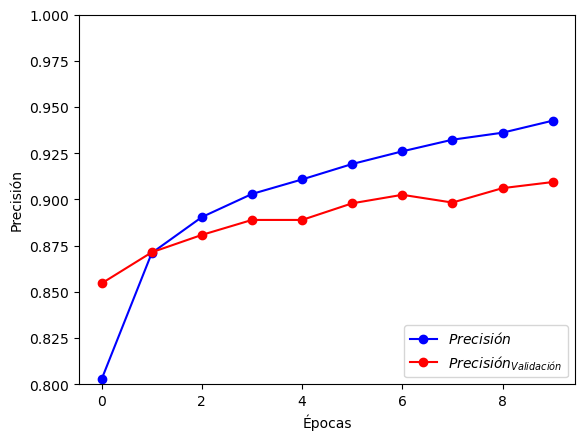

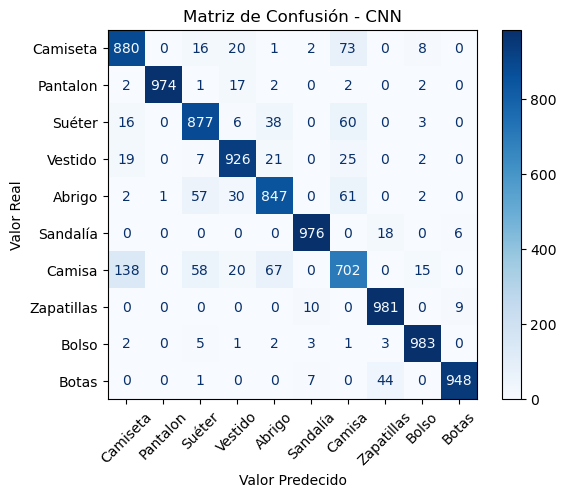

              precision    recall  f1-score   support

    Camiseta       0.83      0.88      0.85      1000
    Pantalon       1.00      0.97      0.99      1000
      Suéter       0.86      0.88      0.87      1000
     Vestido       0.91      0.93      0.92      1000
      Abrigo       0.87      0.85      0.86      1000
    Sandalía       0.98      0.98      0.98      1000
      Camisa       0.76      0.70      0.73      1000
  Zapatillas       0.94      0.98      0.96      1000
       Bolso       0.97      0.98      0.98      1000
       Botas       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



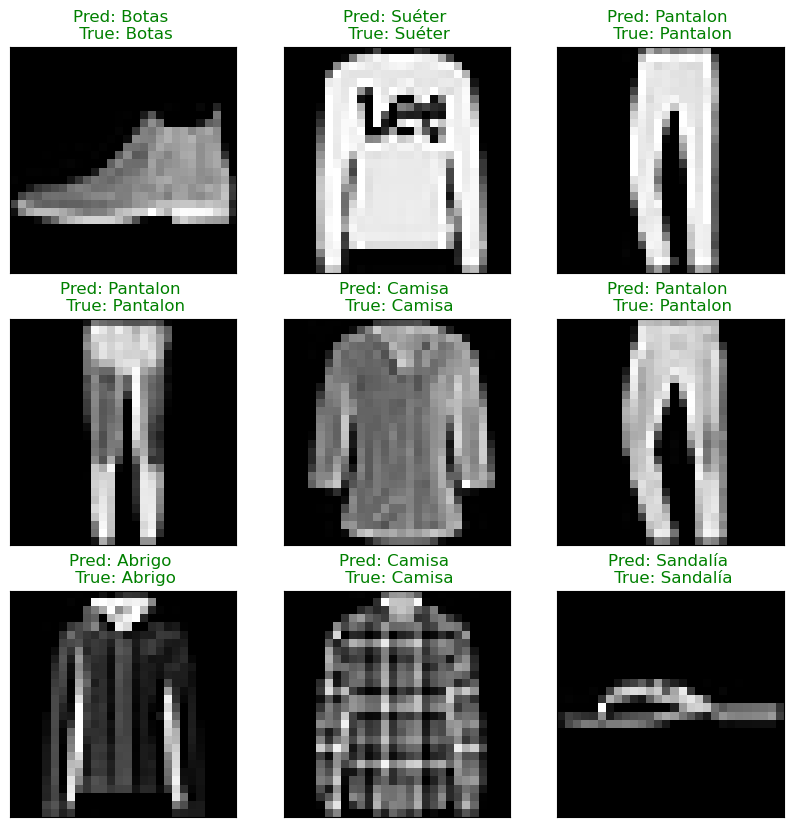

In [4]:
# ---- 1. Crear la base convolucional
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

# ----2. Añadir las capas densas ----
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10))
cnn_model.summary()


# ----3. Compilar y entrenar el modelo
cnn_model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
history = cnn_model.fit(X_train_cnn, y_train, epochs=10,
                        validation_data = (X_test_cnn,y_test))

313/313 - 1s - loss: 0.2905 - accuracy: 0.9094 - 933ms/epoch - 3ms/step
313/313 [==============================] - 1s 3ms/step


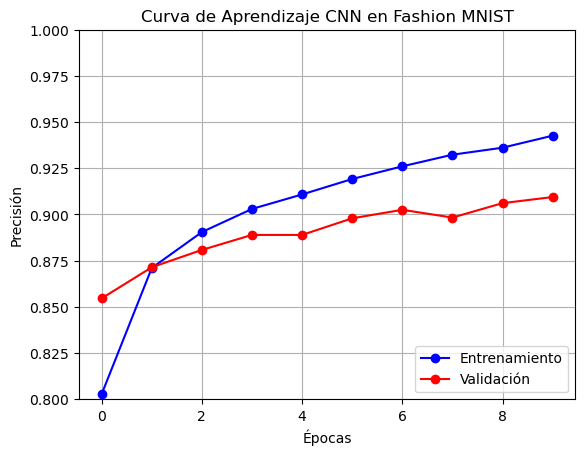

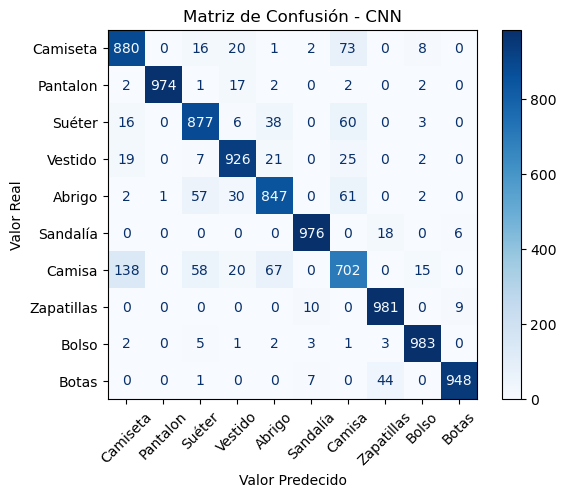

              precision    recall  f1-score   support

    Camiseta       0.83      0.88      0.85      1000
    Pantalon       1.00      0.97      0.99      1000
      Suéter       0.86      0.88      0.87      1000
     Vestido       0.91      0.93      0.92      1000
      Abrigo       0.87      0.85      0.86      1000
    Sandalía       0.98      0.98      0.98      1000
      Camisa       0.76      0.70      0.73      1000
  Zapatillas       0.94      0.98      0.96      1000
       Bolso       0.97      0.98      0.98      1000
       Botas       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



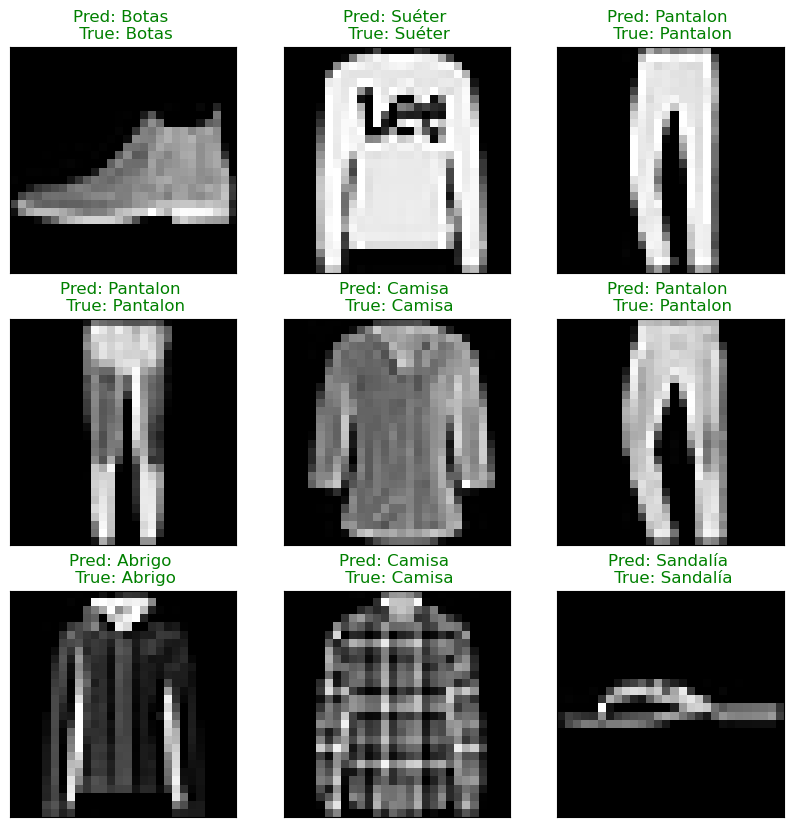

In [22]:
# ----4. Gráficas de Aprendizaje
plt.plot(history.history['accuracy'], label='Entrenamiento',color='blue',marker='o')
plt.plot(history.history['val_accuracy'], label = 'Validación',color='red',marker='o')
plt.plot
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Curva de Aprendizaje CNN en Fashion MNIST')
plt.grid(True)

test_loss, test_acc = cnn_model.evaluate(X_test_cnn,  y_test, verbose=2)

# ---- 5. Predicciones y Matriz de confusión ----
# Obtener predicciones en el set de prueba
y_pred_probs = cnn_model.predict(X_test_cnn)          # probabilidades (logits)
y_pred_cnn = np.argmax(y_pred_probs, axis=1)          # clase con mayor probabilidad

# ---- 6. Display de Matriz de confusión
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", xticks_rotation=45)
plt.title("Matriz de Confusión - CNN")
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Real')
plt.show()

# ---- 7. Reporte de Clasificación ----
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

# ---- 8. Predicciones de CNN ----
fig1 = plt.figure(figsize=(10,10))
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_cnn[i], cmap = 'gray')
    plt.title(f"Pred: {class_names[y_pred_cnn[i]]} \n True: {class_names[y_test[i]]}",
               color=('green' if y_pred_cnn[i] == y_test[i] else 'red'))
plt.show()